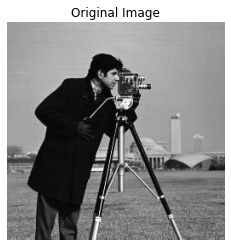

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Loading example image.
img_path = "p2_data/camera_man_grayscale.jpeg"
image = cv2.imread(img_path, 0)

_ = plt.figure()
ax = plt.subplot()
ax.imshow(image, cmap="gray")
ax.axis("off")
ax.set_title("Original Image")
plt.show()

## Problem 2 (iii)

### Part 1: Correlate Image
Complete the `correlate_image` function below.

In [2]:
def correlate_image(image: np.ndarray, filter: np.ndarray) -> np.ndarray:
    """Correlate the grayscale image with the filter.
    
    Args:
        image: (N, M) The grayscale image to filter.
        filter: (3, 3) The filter to apply.

    Returns:
        filtered_image: (N-2, M-2) filtered image.
    """
    image = image.copy()

    # --------- YOUR CODE STARTS HERE ---------------
    # Hint: You can use the correlate2d function from scipy.signal.
    filtered_image = signal.correlate2d(image, filter, boundary='fill', mode='valid')

    # --------- YOUR CODE ENDS HERE -----------------

    return filtered_image

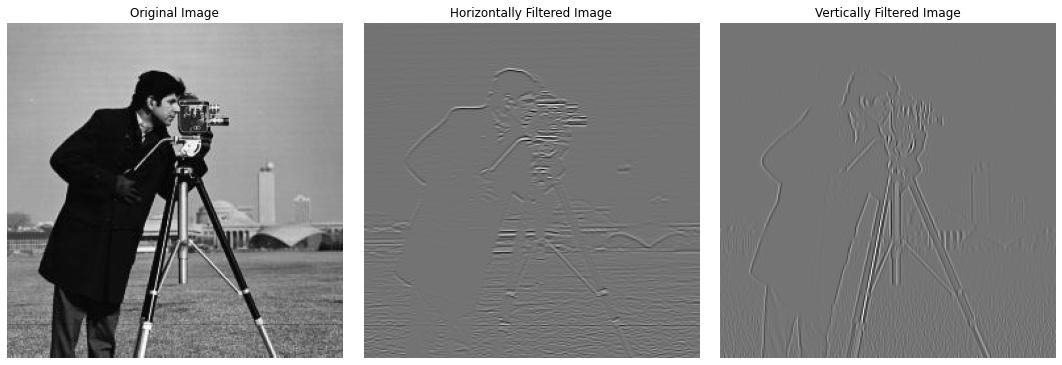

In [3]:
# Evaluate your correlation function implementation!
# NOTE: You should not need to modify the code below.

# Example a) horizontal edge detection filter.
horizontal_filter = np.array([[-1, -1, -1],
                              [2, 2, 2],
                              [-1, -1, -1]])
horizontal_filtered_image = correlate_image(image, horizontal_filter)
                              
# Example b) vertical edge detection filter.
vertical_filter = np.array([[-1, 2, -1],
                            [-1, 2, -1],
                            [-1, 2, -1]])
vertical_filtered_image = correlate_image(image, vertical_filter)

# Plot results.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(horizontal_filtered_image, cmap='gray')
axes[1].set_title('Horizontally Filtered Image')
axes[1].axis('off')

axes[2].imshow(vertical_filtered_image, cmap='gray')
axes[2].set_title('Vertically Filtered Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Part 2: Gaussian Blur Filter
Complete the `create_gaussian_filter` function below.

In [4]:
def create_gaussian_filter(sigma: float) -> np.ndarray:
    """Construct (3, 3) Gaussian filter with the given sigma.
    
    Args:
        sigma: The standard deviation of the Gaussian filter.

    Returns:
        gaussian_filter: (3, 3) Gaussian filter.
    """
    # --------- YOUR CODE STARTS HERE ---------------
    # Hint: np.meshgrid() might be useful here.
    # Hint: Normalize filter so its values sum up to 1.

    ax = np.linspace(-(1), +(1), 3)
    xx, yy = np.meshgrid(ax, ax)

    #Gaussian function
    gaussian = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))

    #Normalize
    gaussian_filter = gaussian / np.sum(gaussian)
    # --------- YOUR CODE ENDS HERE -----------------
    
    return gaussian_filter


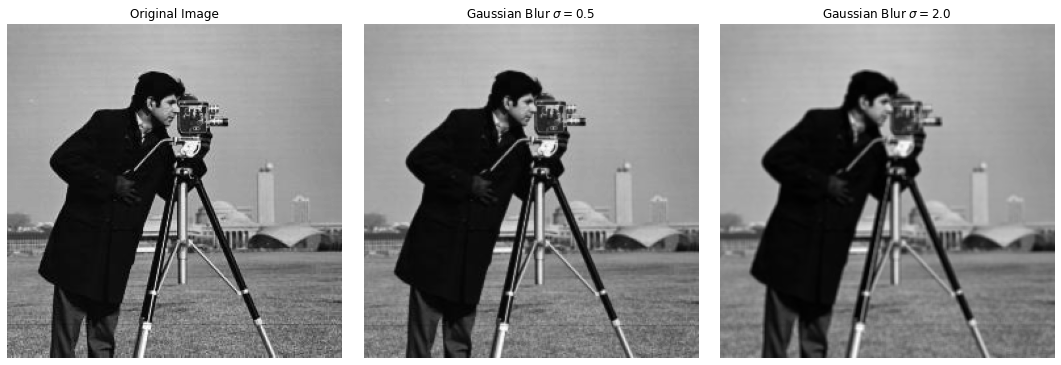

In [5]:
# Evaluate your Gaussian filter function implementation!
# NOTE: You should not need to modify the code below.

# Example a) Gaussian filter with 0.5 standard deviation.
gaussian_filter_1 = create_gaussian_filter(0.5)
gaussian_filtered_image_1 = correlate_image(image, gaussian_filter_1)
                              
# Example b) Gaussian filter with 2.0 standard deviation.
gaussian_filter_2 = create_gaussian_filter(2.0)
gaussian_filtered_image_2 = correlate_image(image, gaussian_filter_2)

# Plot results.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(gaussian_filtered_image_1, cmap='gray')
axes[1].set_title(r'Gaussian Blur $\sigma=0.5$')
axes[1].axis('off')

axes[2].imshow(gaussian_filtered_image_2, cmap='gray')
axes[2].set_title(r'Gaussian Blur $\sigma=2.0$')
axes[2].axis('off')

plt.tight_layout()
plt.show()
